In [1]:
import numpy as np
import gym
from learning import Agent
from main import plot_simulation

MODEL_DIR = "../models/"

Using TensorFlow backend.


In [2]:
env = gym.make('CarRacing-v1', seed=0xc4c3b3d54fd64f0b).env
env.reset()

/home/philippe/Documents/UCB/S2/206B/racecar_control/gym/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


array([ 2.19262177e+02, -5.47429695e+01,  1.47071041e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -5.08652627e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [3]:
def simulate(model, data_dir, lstm=False):
    if type(model) is str:
        model = MODEL_DIR + model
        
    agent = Agent(model, env, lstm=lstm)
    states = np.load(data_dir + "/states.npy")
    actions = np.load(data_dir + "/actions.npy")
    observations = np.load(data_dir + "/observations.npy")
    plot_simulation(observations, env, agent, data=(states, actions), H=states.shape[0])

[learning.py] initializing agent
[learning.py] loading model (../models/dynamics64.h5)
__________________________________________________________________________________________________
Model: "dynamics"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
z (InputLayer)                  (None, 6)            0                                            
__________________________________________________________________________________________________
u (InputLayer)                  (None, 3)            0                                            
__________________________________________________________________________________________________
input_layer (Concatenate)       (None, 9)            0           z[0][0]                          
                                                                 u[0][0]                          
____

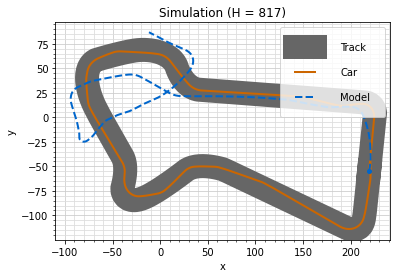

In [4]:
simulate("dynamics64.h5", "../save/simple/slow")

[learning.py] initializing agent
[learning.py] loading model (../models/dynamics72.h5)
__________________________________________________________________________________________________
Model: "dynamics"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
z (InputLayer)                  (None, 6)            0                                            
__________________________________________________________________________________________________
u (InputLayer)                  (None, 3)            0                                            
__________________________________________________________________________________________________
input_layer (Concatenate)       (None, 9)            0           z[0][0]                          
                                                                 u[0][0]                          
____

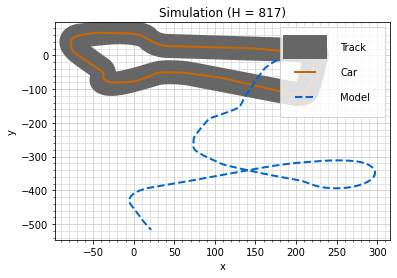

In [5]:
simulate("dynamics72.h5", "../save/simple/slow")

[learning.py] initializing agent
[learning.py] loading model (../models/dynamics96.h5)
__________________________________________________________________________________________________
Model: "dynamics"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
z (InputLayer)                  (None, 6)            0                                            
__________________________________________________________________________________________________
u (InputLayer)                  (None, 3)            0                                            
__________________________________________________________________________________________________
input_layer (Concatenate)       (None, 9)            0           z[0][0]                          
                                                                 u[0][0]                          
____

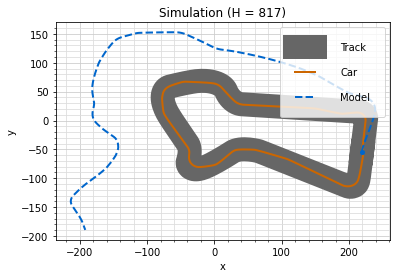

In [6]:
simulate("dynamics96.h5", "../save/simple/slow")

[learning.py] initializing agent
[learning.py] loading model (../models/dynamics128.h5)
__________________________________________________________________________________________________
Model: "dynamics"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
z (InputLayer)                  (None, 6)            0                                            
__________________________________________________________________________________________________
u (InputLayer)                  (None, 3)            0                                            
__________________________________________________________________________________________________
input_layer (Concatenate)       (None, 9)            0           z[0][0]                          
                                                                 u[0][0]                          
___

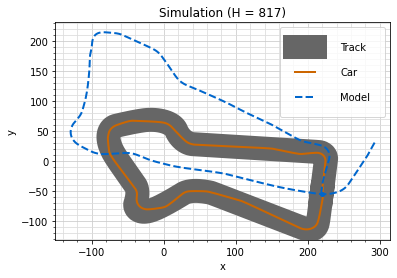

In [7]:
simulate("dynamics128.h5", "../save/simple/slow")

In [8]:
class LinearModel:
    def predict(self, inputs):
        z = inputs[0].squeeze()
        u = inputs[1].squeeze()
        x_state = np.array([1, z[0], z[3], z[4], 
                            u[1] * np.cos(z[2]), u[2] * np.cos(z[2]),
                            u[1] * np.sin(z[2]), u[2] * np.sin(z[2]),
                      np.sqrt(z[3]**2 + z[4]**2) * np.sin(u[0])
                     ])
        x_coeffs = np.array([6.2376, -0.1171, -0.3393, -0.2500, 52.5167, -91.9445, 15.1794, -7.5824, -0.0458])
        
        y_state = np.array([z[1], z[2], z[3], z[4], u[0], u[1], u[2], 
                            u[1] * np.cos(z[2]), u[2] * np.cos(z[2]),
                            u[1] * np.sin(z[2]), u[2] * np.sin(z[2]),
                      np.sqrt(z[3]**2 + z[4]**2) * np.sin(u[0])
                     ])
        y_coeffs = np.array([-0.1383, -2.3550, 0.1694, -0.3919, -9.5103, 7.1728, 3.2603, -8.6824, 16.7642,
                            55.0365, -108.7370, 0.1456])
        
        t_state = np.array([z[0], z[2], z[4], z[5], u[0], u[1],
                      np.sqrt(z[3]**2 + z[4]**2) * np.sin(u[0])])
        
        t_coeffs = np.array([-0.0015, 0.1194, 0.0043, -1.1130, -5.9254, -0.4191, -0.0857])
        
        return np.array([[np.inner(x_state, x_coeffs),
                          np.inner(y_state, y_coeffs),
                         np.inner(t_state, t_coeffs)]])
        
linear_model = LinearModel()

z = np.array([[1, 2, 3, 4, 5, 6, 7]])
u = np.array([[8, 9, 10]])
linear_model.predict([z, u])

array([[ 454.12532823, -158.77895206,  -58.01780811]])

[learning.py] initializing agent
[main.py] plotting simulation


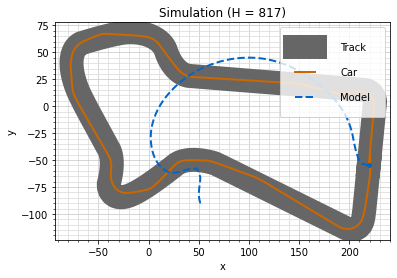

In [9]:
simulate(linear_model, "../save/simple/slow")

In [10]:
# import matplotlib.pyplot as plt

# data_dir = "../save/simple"
# states = np.load(data_dir + "/states.npy")
# actions = np.load(data_dir + "/actions.npy")
# observations = np.load(data_dir + "/observations.npy")

# track = plan_trajectory(env)
# plt.plot(states[:47, 0], states[:47, 1], "-+")# 47
# plt.plot(track[:47, 0], track[:47, 1], "-o")
# plt.show()

NameError: name 'plan_trajectory' is not defined

In [ ]:
# p = [0]
# for i in range(1, 48):
#     p.append(p[-1] + np.sqrt((states[i+1][0] - states[i][0]**2)**2 + (states[i+1][1] - states[i][1]**2)**2))

# np.array(p) / np.sqrt((env.track[1][2] - env.track[0][2]**2)**2 + (env.track[1][3] - env.track[0][3]**2)**2)

[learning.py] initializing agent
[learning.py] loading model (../models/dynamics_lstm_non_stateful.h5)
__________________________________________________________________________________________________
Model: "dynamics"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 1, 9)              0         
_________________________________________________________________
hidden_layer_1 (LSTM)        (None, 32)                5376      
_________________________________________________________________
output_layer (Dense)         (None, 3)                 99        
Total params: 5,475
Trainable params: 5,475
Non-trainable params: 0
_________________________________________________________________

[main.py] plotting simulation


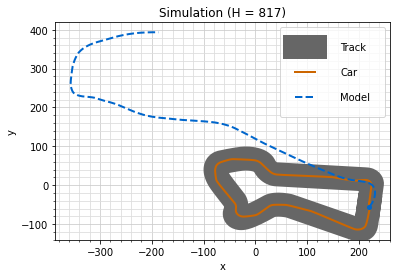

In [11]:
simulate("dynamics_lstm_non_stateful.h5", "../save/simple/slow", lstm=True)

[learning.py] initializing agent
[learning.py] loading model (../models/dynamics64.h5)
__________________________________________________________________________________________________
Model: "dynamics"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
z (InputLayer)                  (None, 6)            0                                            
__________________________________________________________________________________________________
u (InputLayer)                  (None, 3)            0                                            
__________________________________________________________________________________________________
input_layer (Concatenate)       (None, 9)            0           z[0][0]                          
                                                                 u[0][0]                          
____

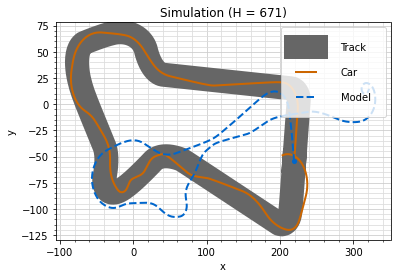

In [13]:
simulate("dynamics64.h5", "../save/simple/sliding")

[learning.py] initializing agent
[learning.py] loading model (../models/dynamics128.h5)
__________________________________________________________________________________________________
Model: "dynamics"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
z (InputLayer)                  (None, 6)            0                                            
__________________________________________________________________________________________________
u (InputLayer)                  (None, 3)            0                                            
__________________________________________________________________________________________________
input_layer (Concatenate)       (None, 9)            0           z[0][0]                          
                                                                 u[0][0]                          
___

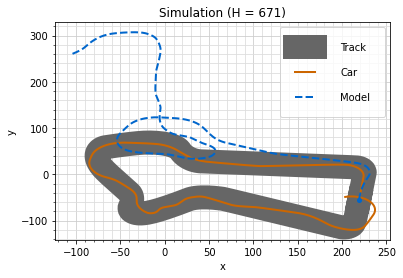

In [12]:
simulate("dynamics128.h5", "../save/simple/sliding")

[learning.py] initializing agent
[main.py] plotting simulation


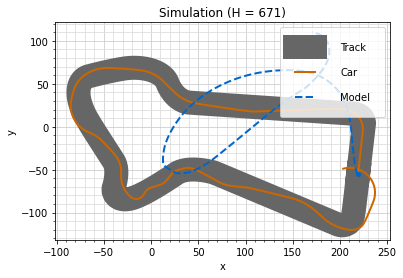

In [14]:
simulate(linear_model, "../save/simple/sliding")

[learning.py] initializing agent
[learning.py] loading model (../models/dynamics_lstm_non_stateful.h5)
__________________________________________________________________________________________________
Model: "dynamics"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 1, 9)              0         
_________________________________________________________________
hidden_layer_1 (LSTM)        (None, 32)                5376      
_________________________________________________________________
output_layer (Dense)         (None, 3)                 99        
Total params: 5,475
Trainable params: 5,475
Non-trainable params: 0
_________________________________________________________________

[main.py] plotting simulation


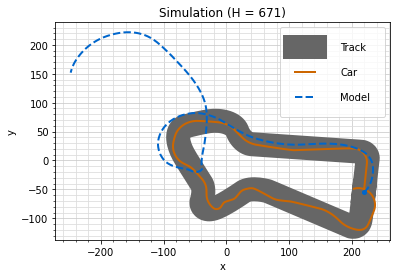

In [16]:
simulate("dynamics_lstm_non_stateful.h5", "../save/simple/sliding", lstm=True)